In [605]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%config InlineBackend.figure_format = 'svg' 
plt.style.use('bmh')
plt.rcParams['image.cmap'] = 'Paired_r'
%matplotlib inline

### 1. Dataset

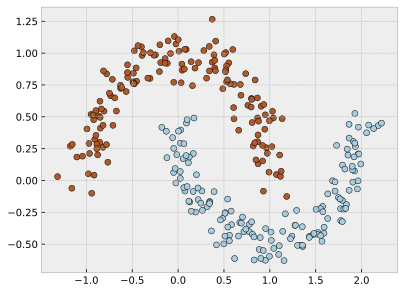

In [606]:
from sklearn.datasets import make_moons
X, Y = make_moons(n_samples=300, noise=0.1)
plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k')
plt.show()

In [607]:
Y=Y.reshape(-1,1)

In [608]:
#print(Y)

In [609]:
print(X)

[[-2.04094024e-01  8.55233478e-01]
 [-3.06242569e-01  8.01508181e-01]
 [ 1.73143101e-01  4.90449725e-01]
 [ 6.05528409e-01  5.72472238e-01]
 [ 1.29222983e+00 -2.34595095e-01]
 [-7.35388661e-01  6.64737920e-01]
 [-7.16682502e-01  7.94091472e-01]
 [ 2.07781392e+00  4.35314858e-01]
 [ 8.94764373e-01 -4.48285120e-01]
 [-1.10401315e+00  1.83938965e-01]
 [ 1.24098276e+00 -4.37085959e-01]
 [ 1.02846111e+00  5.43224767e-01]
 [ 1.56798627e-01  7.44221854e-01]
 [-5.49782486e-01  8.09552523e-01]
 [ 5.39297223e-01 -1.45863723e-01]
 [ 1.90938920e+00  3.06746872e-01]
 [ 1.52552872e+00 -4.08813943e-01]
 [-8.07341109e-01  5.44262390e-01]
 [ 9.11879729e-02  4.50707016e-01]
 [-7.78893966e-01  8.36869073e-01]
 [ 1.74817542e+00 -1.33669423e-01]
 [ 1.57551043e+00 -2.03885904e-01]
 [ 7.75452549e-01 -3.44767445e-01]
 [ 5.60272613e-01 -4.29550787e-01]
 [ 1.43313616e+00 -4.38692228e-01]
 [ 2.00014326e-01  4.50868691e-02]
 [ 8.68177338e-01  3.03876163e-01]
 [ 7.44948364e-02 -8.25652262e-02]
 [ 7.60888556e-01  5

In [610]:
# Affichage dans un DataFrame
dataset = pd.DataFrame(X, columns=['x1', 'x2'])
dataset['label'] = Y
print(dataset.head())

         x1        x2  label
0 -0.204094  0.855233      0
1 -0.306243  0.801508      0
2  0.173143  0.490450      1
3  0.605528  0.572472      0
4  1.292230 -0.234595      1


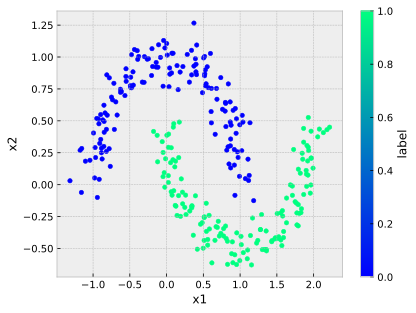

In [611]:
# Visualisation
dataset.plot.scatter(x='x1',y='x2', c='label', colormap='winter')
plt.show()

In [612]:
def mapFeature(X1, X2, degree):
    #res = np.ones(X1.shape[0])
    res = np.zeros((X1.shape[0], 0))
    for i in range(1,degree + 1):
        for j in range(0,i + 1):
            res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j)))
    return res

In [613]:
degree=3
Poly_X=mapFeature(X[:, 0],X[:, 1],degree)

print(Poly_X.shape)

(300, 9)


In [614]:
print(Poly_X[:10])

[[-2.04094024e-01  8.55233478e-01  4.16543705e-02 -1.74548042e-01
   7.31424301e-01 -8.50140807e-03  3.56242121e-02 -1.49279329e-01
   6.25538549e-01]
 [-3.06242569e-01  8.01508181e-01  9.37845113e-02 -2.45455925e-01
   6.42415364e-01 -2.87208097e-02  7.51690531e-02 -1.96734932e-01
   5.14901170e-01]
 [ 1.73143101e-01  4.90449725e-01  2.99785336e-02  8.49179864e-02
   2.40540932e-01  5.19057628e-03  1.47029635e-02  4.16480031e-02
   1.17973234e-01]
 [ 6.05528409e-01  5.72472238e-01  3.66664654e-01  3.46648203e-01
   3.27724463e-01  2.22025864e-01  2.09905335e-01  1.98446473e-01
   1.87613157e-01]
 [ 1.29222983e+00 -2.34595095e-01  1.66985794e+00 -3.03150780e-01
   5.50348586e-02  2.15784025e+00 -3.91740482e-01  7.11176860e-02
  -1.29109079e-02]
 [-7.35388661e-01  6.64737920e-01  5.40796483e-01 -4.88840729e-01
   4.41876502e-01 -3.97695602e-01  3.59487929e-01 -3.24950969e-01
   2.93732067e-01]
 [-7.16682502e-01  7.94091472e-01  5.13633808e-01 -5.69111463e-01
   6.30581266e-01 -3.6811236

In [615]:
# Séparer les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(Poly_X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(240, 9)
(60, 9)
(240, 1)
(60, 1)


2. Modèle

In [616]:
# La fonction sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [617]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [618]:
# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

3. Fonction Coût

In [619]:
def log_loss(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

4. Optimisation - Gradient et Descente de Gradient

In [620]:
def gradients(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [621]:
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

5. Prédiction

In [622]:
def predict(X, W, b):
    A = modele(X, W, b)
    #print(A)
    return A >= 0.5

6. Modèle final

In [623]:
def regression_logistique(X, y, learning_rate=0.1, n_iter=10000):
  # Initialisation
    W, b = initialisation(X)
    loss_history = []
  # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

  # Prediction
    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution des erreurs')
    return W,b

In [624]:
W,b=regression_logistique(X_train, y_train)

6. 1 Evaluation du modèle et Visualisation

In [625]:
from sklearn.metrics import accuracy_score
y_pred = predict(X_test, W, b)
print("Accuracy=",np.round(accuracy_score(y_test, y_pred)*100),'%')

Accuracy= 97.0 %


In [626]:

from sklearn.metrics import confusion_matrix
y_pred = predict(X_test, W, b)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[27  0]
 [ 2 31]]


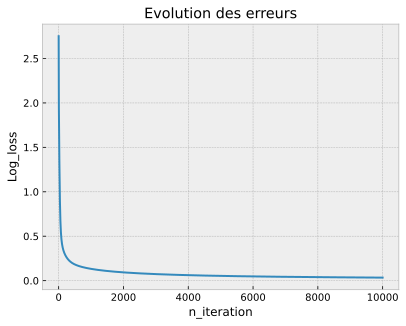

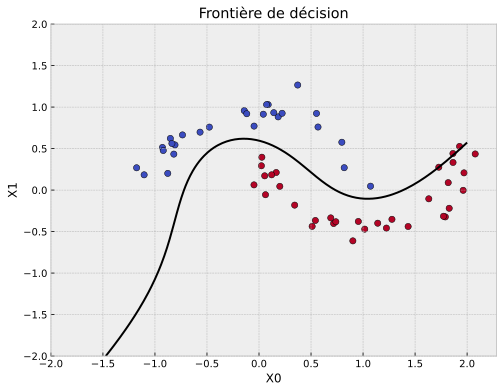

In [627]:
# -------------------------------
# Affichage de la frontière de décision
# -------------------------------
plt.figure(figsize=(8,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='coolwarm', edgecolors='k', s=40)

# Grille plus dense et plus large
u = np.linspace(-2, 2, 200)
v = np.linspace(-2, 2, 200)
U, V = np.meshgrid(u, v)

# Vecteurs aplatis
U_flat, V_flat = U.ravel(), V.ravel()

# Projection polynomiale
grid_poly = mapFeature(U_flat, V_flat, degree)

# Calcul de la sortie du modèle
Z = grid_poly.dot(W) + b
Z = Z.reshape(U.shape)

# Affichage des contours
plt.contour(U, V, Z, levels=[0], linewidths=2, colors='black')
plt.title("Frontière de décision")
plt.xlabel("X0")
plt.ylabel("X1")
plt.grid(True)
plt.show()

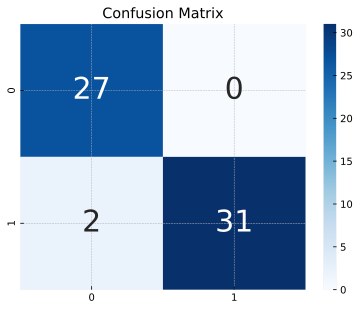

In [628]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
## https://www.kaggle.com/agungor2/various-confusion-matrix-plots
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()